# Pymaceuticals Inc.
---

### Analysis

- Bigger mice get bigger tumors on average, as seen in the final graph
- Capomulin and Ramicane seem to be the most effective, given that they result in lower endpoint tumor volumes
- The most mice are also on Capomulin and Ramicane, which could skew data since sample is larger
- The study is almost evenly split male and female mice, and neither seem to have an effect on anything else, so we can assume drug regimens work regardless of sex
- Capomulin is shown to be succesful in at least one mouse (b128)
- Ceftamin had the highest variance of drugs analyzed in the final section
 

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
bigdata = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
bigdata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice.
len(bigdata['Mouse ID'].unique())

249

In [18]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dupemice = bigdata[bigdata[['Mouse ID', 'Timepoint']].duplicated() == True]
dupemiceid = dupemice['Mouse ID'].unique()

In [20]:
# Optional: Get all the data for the duplicate mouse ID.
dupemice = bigdata.loc[bigdata['Mouse ID'] == dupemiceid[0]]
dupemice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [21]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandata = bigdata.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
cleandata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [23]:
# Checking the number of mice in the clean DataFrame.
len(cleandata['Mouse ID'].unique())

249

## Summary Statistics

In [ ]:
druggroup = cleandata.groupby('Drug Regimen')

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drugregimendat = cleandata.set_index(['Drug Regimen'])
drugregimengroup = drugregimendat.groupby('Drug Regimen')

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
meantumor = drugregimengroup['Tumor Volume (mm3)'].mean()
medtumor = drugregimengroup['Tumor Volume (mm3)'].median()
vartumor = drugregimengroup['Tumor Volume (mm3)'].var()
stdtumor = drugregimengroup['Tumor Volume (mm3)'].std()
semtumor = drugregimengroup['Tumor Volume (mm3)'].sem()

sumdata = pd.DataFrame({'Mean Tumor Volume' : meantumor,
                       'Median Tumor Volume' : medtumor,
                       'Tumor Volume Variance' : vartumor,
                       'Tumor Volume Std. Dev' : stdtumor,
                       'Tumor Volume Std. Err.' : semtumor})
sumdata

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [25]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
aggdata = drugregimendat.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
aggdata
# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

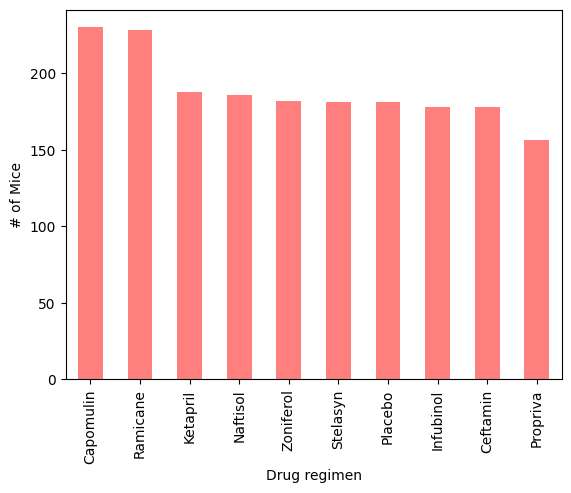

In [26]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Filter Data down
regvcount = cleandata[['Drug Regimen', 'Timepoint']]
drugcounts = regvcount['Drug Regimen'].value_counts()
drugcounts.plot(kind = 'bar', color = 'r', alpha = .5,
               xlabel = 'Drug regimen', ylabel = '# of Mice')
plt.show()

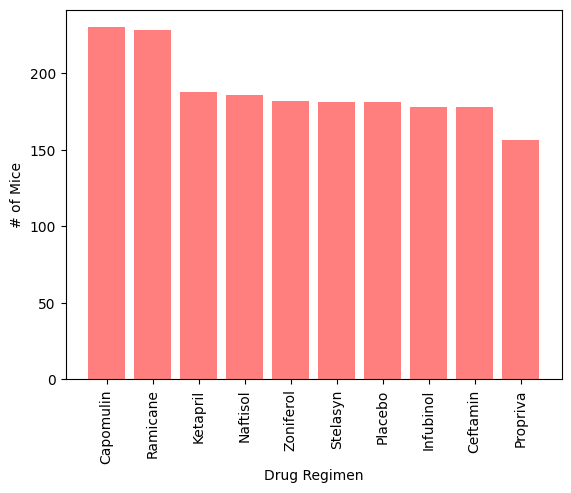

In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugs = drugcounts.index.values
count = drugcounts.values

plt.bar(drugs, count, color = 'r', alpha = .5)
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Mice')
plt.show()

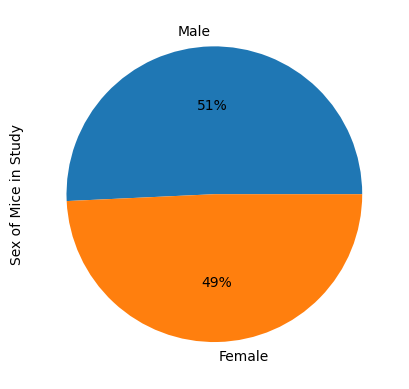

In [33]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
malevfemale = cleandata["Sex"].value_counts()
malevfemale.plot(kind = "pie" , autopct="%1.0f%%", ylabel = "Sex of Mice in Study")
plt.show()

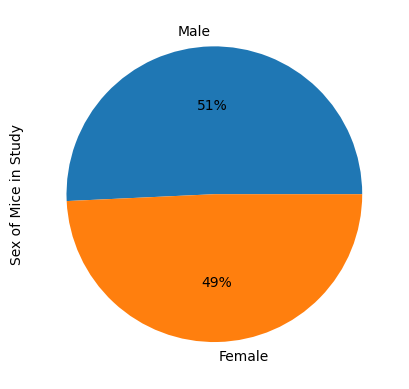

In [37]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
sex = malevfemale.index.values
counts2 = malevfemale.values
# Make the pie chart
plt.pie(counts2, labels = sex, autopct = "%1.0f%%")
plt.ylabel('Sex of Mice in Study')
plt.show()

## Quartiles, Outliers and Boxplots

In [94]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
specdrugs = cleandata[(cleandata['Drug Regimen'] == 'Capomulin') | (cleandata['Drug Regimen'] == 'Ramicane') |
                      (cleandata['Drug Regimen'] == 'Infubinol') | (cleandata['Drug Regimen'] == 'Ceftamin')]
# Start by getting the last (greatest) timepoint for each mouse
#Start by getting the last (greatest) timepoint for each mouse
bigtime = specdrugs.groupby(["Drug Regimen","Mouse ID"]).last()
bigtime = bigtime.reset_index()

reducedbigtime=bigtime[["Drug Regimen", "Tumor Volume (mm3)"]]

capomulindf = reducedbigtime.loc[reducedbigtime["Drug Regimen"] == "Capomulin"]
capomulindf = capomulindf.reset_index()

ramicanedf = reducedbigtime.loc[reducedbigtime["Drug Regimen"] == "Ramicane"]
ramicanedf = ramicanedf.reset_index()

infubinoldf = reducedbigtime.loc[reducedbigtime["Drug Regimen"] == "Infubinol"]
infubinoldf = infubinoldf.reset_index()

ceftamindf = reducedbigtime.loc[reducedbigtime["Drug Regimen"] == "Ceftamin"]
ceftamindf = ceftamindf.reset_index()

newdf = pd.DataFrame({"Capomulin": capomulindf["Tumor Volume (mm3)"],
         "Ramicane": ramicanedf["Tumor Volume (mm3)"],
          "Infubinol": infubinoldf["Tumor Volume (mm3)"],
          "Ceftamin": ceftamindf["Tumor Volume (mm3)"]})


newdf

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


In [82]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = []
for drug in reducedbigtime2['Drug Regimen']:
    if drug not in treatment:
        treatment.append(drug)
# Create empty list to fill with tumor vol data (for plotting)
tumorvol = []
outliers = []
upperqlist = []
lowerqlist = []
# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment:
    quartiles = newdf[drug].quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    # Locate the rows which contain mice on each drug and get the tumor volumes
    for i in newdf[drug]:
        tumorvol.append(i)
    # Determine outliers using upper and lower bounds
    lbound = lowerq - (1.5*iqr)
    ubound = upperq + (1.5*iqr)
    for i in tumorvol:
        if (i > ubound) | (i < lbound):
            outliers.append(i)
    print(f'Possible Outliers for {drug}: {outliers}')
    tumorvol = []
    outliers = []

Possible Outliers for Capomulin: []
Possible Outliers for Ceftamin: []
Possible Outliers for Infubinol: [36.3213458]
Possible Outliers for Ramicane: []


Text(0.5, 0, '')

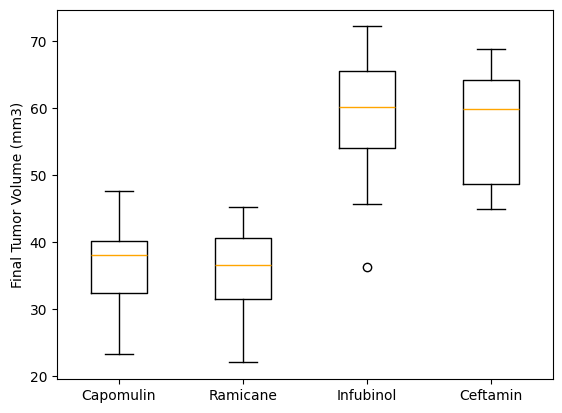

In [95]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
boxplot = newdf.boxplot(grid = False, color = dict(boxes = 'k', whiskers='k', medians='orange'))
boxplot.set_ylabel('Final Tumor Volume (mm3)')
boxplot.set_xlabel('')

## Line and Scatter Plots

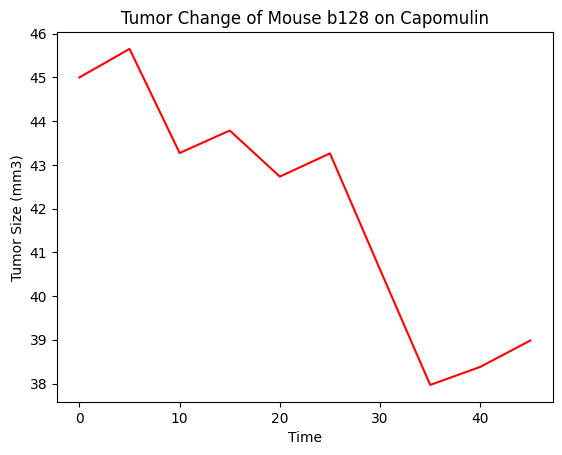

In [88]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
singlemouse = cleandata[(cleandata['Mouse ID'] == 'b128')]
singlemouse
plt.plot(singlemouse['Timepoint'],singlemouse['Tumor Volume (mm3)'], color = 'r')
plt.title("Tumor Change of Mouse b128 on Capomulin")
plt.xlabel("Time")
plt.ylabel("Tumor Size (mm3)")
plt.show()

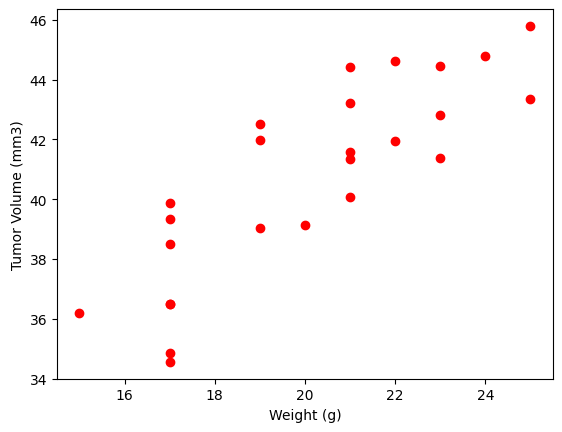

In [89]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capdf = cleandata.loc[(cleandata['Drug Regimen'] == 'Capomulin')]
groupcapdf = capdf.groupby('Mouse ID')

#find and store avg tumor vol for each weight
avgtumorvol = groupcapdf[('Tumor Volume (mm3)')].mean()
weight = groupcapdf['Weight (g)'].mean()
avgcapdf = pd.DataFrame({'Weight (g)': weight,
                            'Tumor Volume (mm3)': avgtumorvol})
#graph build and display
plt.scatter(weight, avgtumorvol, color = 'r')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


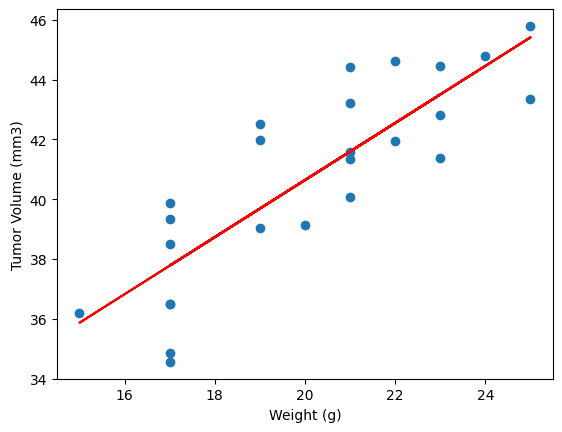

In [92]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(weight,avgtumorvol)

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

xvalues=avgcapdf['Weight (g)']
yvalues=avgcapdf['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avgtumorvol)
regressvalues = xvalues * slope + intercept
lineeq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xvalues,yvalues)
plt.plot(xvalues,regressvalues,'r-')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()